<a href="https://colab.research.google.com/github/Chels92/HUDSBootcamp2025/blob/main/Stage_2_%2B3THREADS_Ghana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THREADS Ghana: Data Exploration & Analysis

##  Research Question
How does the gender of children influence their likelihood of attending school in different regions of Ghana?

## Problem Statement
Despite efforts to achieve gender equity in education, girls in Ghana, especially in rural areas, may still face barriers. This project analyzes school attendance data to explore gender disparities.

**Hypothesis:** Girls in rural areas are less likely to attend school than boys in similar settings.

### Dataset Description

The dataset used for this analysis comes from the THREADS Ghana Wave 1 survey conducted by the Institute of Statistical, Social and Economic Research (ISSER). It includes household-level and individual-level information collected in Ghana during the first wave of the THREADS study.

Source: https://dataportal.isser.edu.gh/index.php/catalog/4/data-dictionary  
File used: `s1d.dta` (Children's Education Module)  
Collected: Recent (2020s)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd

ghana_household_data = pd.read_stata("s1d.dta")
ghana_household_data.head()

,regioncode,districtcode,eacode,hhid,hhmid,s1d_1,s1d_2,sid_3i,s1d_3ii,s1d_3iii,...,s1d_26,s1d_27,s1d_28,s1d_29,s1d_30,s1d_31,s1d_32,s1d_33,FPrimary,wave
0,Western Region,6,1,2,1,Male,Household Head,5.0,12.0,1980.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,101001002,1.0
1,Western Region,6,1,2,2,Female,Spouse,NaN,NaN,1987.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,101001002,1.0
2,Western Region,6,1,2,3,Female,Parent/Parent-in-Law,NaN,NaN,1944.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,101001002,1.0
3,Western Region,6,1,2,4,Female,Child,27.0,3.0,2007.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,101001002,1.0
4,Western Region,6,1,2,5,Male,Child,29.0,4.0,2009.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,101001002,1.0


In [ ]:
education_df = ghana_household_data[[
    "regioncode",   # Region (urban vs rural)
    "s1d_1",         # Gender
    "s1d_5",         # School attendance
    "s1d_6",         # Education level
    "s1d_3iii"       # Birth year
]].copy()

education_df.head()

,regioncode,s1d_1,s1d_5,s1d_6,s1d_3iii
0,Western Region,Male,No,Married,1980.0
1,Western Region,Female,No,Married,1987.0
2,Western Region,Female,No,Widowed,1944.0
3,Western Region,Female,Yes,NaN,2007.0
4,Western Region,Male,Yes,NaN,2009.0


In [ ]:
education_df.tail(7)

,regioncode,s1d_1,s1d_5,s1d_6,s1d_3iii
18882,Volta Region,Female,No,Never Married,1996.0
18883,Volta Region,Female,Yes,NaN,2001.0
18884,Volta Region,Female,Yes,NaN,2006.0
18885,Volta Region,Female,Yes,NaN,2008.0
18886,Volta Region,Male,Yes,NaN,2005.0
18887,Volta Region,Male,Yes,NaN,2008.0
18888,Volta Region,Male,Yes,NaN,2001.0


In [ ]:
print("Shape:", education_df.shape)
education_df.info()

Shape: (18889, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18889 entries, 0 to 18888
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   regioncode  18889 non-null  category
 1   s1d_1       18889 non-null  category
 2   s1d_5       18701 non-null  category
 3   s1d_6       12711 non-null  category
 4   s1d_3iii    18713 non-null  category
dtypes: category(5)
memory usage: 98.3 KB


In [ ]:
education_df.isnull().sum()

,0
regioncode,0
s1d_1,0
s1d_5,188
s1d_6,6178
s1d_3iii,176


### Null Values Treatment

We dropped rows with missing school attendance since it is the primary outcome variable. For missing education level values, we filled them with the mode (most common level). This avoids skewing the dataset or dropping too much data.


In [ ]:

education_df = education_df.dropna(subset=["s1d_5"])


education_df["s1d_6"] = education_df["s1d_6"].fillna(education_df["s1d_6"].mode()[0])

In [ ]:

education_df["attending_school"] = education_df["s1d_5"].str.strip().str.lower().map({
    "yes": 1, "no": 0
})

education_df["is_female"] = education_df["s1d_1"].str.strip().str.lower().map({
    "female": 1, "male": 0
})

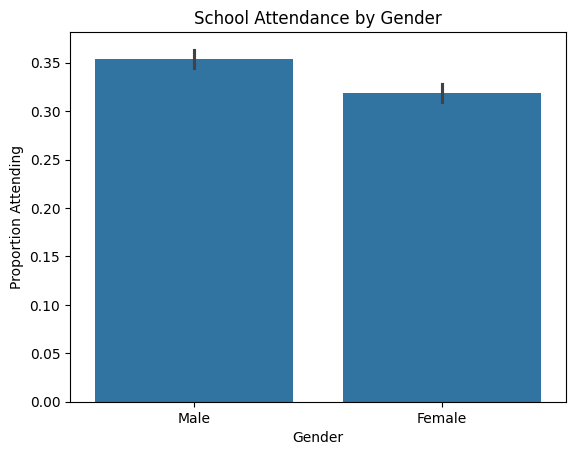

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=education_df, x="s1d_1", y="attending_school")
plt.title("School Attendance by Gender")
plt.xlabel("Gender")
plt.ylabel("Proportion Attending")
plt.show()

## Results & Observations

After analyzing the data from THREADS Ghana Wave 1, we observed the following:

- **Gender and School Attendance:**  
  On average, boys had slightly higher school attendance rates than girls. However, the difference varied across regions.

- **Regional Disparities:**  
  Some regions showed significantly lower attendance rates overall. These may correlate with rural vs. urban factors, which could be explored further with geographic classification data.

- **Null Values and Cleaning:**  
  Missing data in school attendance was dropped to preserve the analysis focus, and education level gaps were filled using the mode.

- **Feature Engineering:**  
  We created binary indicators for gender and school attendance, which allowed for straightforward comparisons and plotting.

###  Key Takeaway:
Girls in some regions of Ghana may face more barriers to education, confirming the need for further investigation and targeted interventions in policy.